In [34]:
import os
import warnings
from datetime import datetime

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical and machine learning libraries
## Core libraries
from scipy import stats
from scipy.special import boxcox1p
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

## Preprocessing
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler

## Machine learning models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
# from mlxtend.regressor import StackingCVRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

## Dimensionality reduction and clustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Suppress warnings
warnings.filterwarnings('ignore')



In [35]:
# List input files
pd.set_option('display.max_rows', 90)
print("Input files:\n")
for file in os.listdir("./house-price-data"):
    print(file)

Input files:

data_description.txt
sample_submission.csv
test.csv
train.csv


In [36]:
df_submission = pd.read_csv("./house-price-data/sample_submission.csv")

# train data
df_train = pd.read_csv('./house-price-data/train.csv')

# test data
df_test = pd.read_csv('./house-price-data/test.csv')

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [39]:
num_train_rows, num_train_columns = df_train.shape
num_test_rows, num_test_columns = df_test.shape

print("Training Data:")
print(f"Number of Train Rows: {num_train_rows}")
print(f"Number of Train Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Test Rows: {num_test_rows}")
print(f"Number of Test Columns: {num_test_columns}\n")

Training Data:
Number of Train Rows: 1460
Number of Train Columns: 81

Test Data:
Number of Test Rows: 1459
Number of Test Columns: 80



# Missing Data

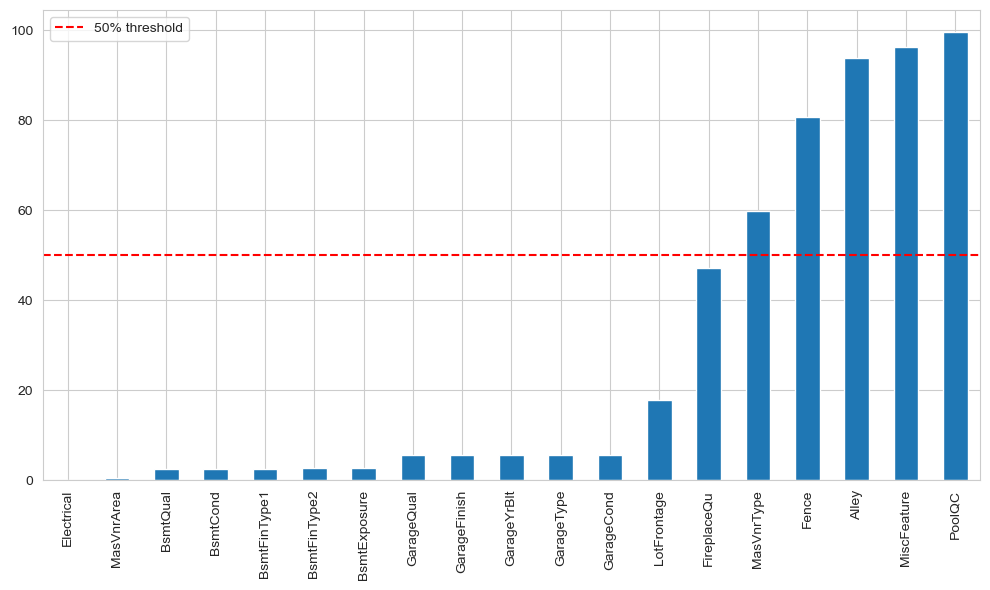

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))  # Set figure size to 12x6 inches
missing = (df_train.isnull().sum() / len(df_train) * 100).sort_values()
missing = missing[missing > 0]
ax = missing.plot.bar()
ax.axhline(y=50, color='r', linestyle='--', label='50% threshold')
ax.legend()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [41]:
# Check for duplicate values
duplicate_count = df_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df_train[df_train.duplicated(keep=False)])
else:
    print("No duplicate rows found in the dataset.")

Number of duplicate rows: 0
No duplicate rows found in the dataset.


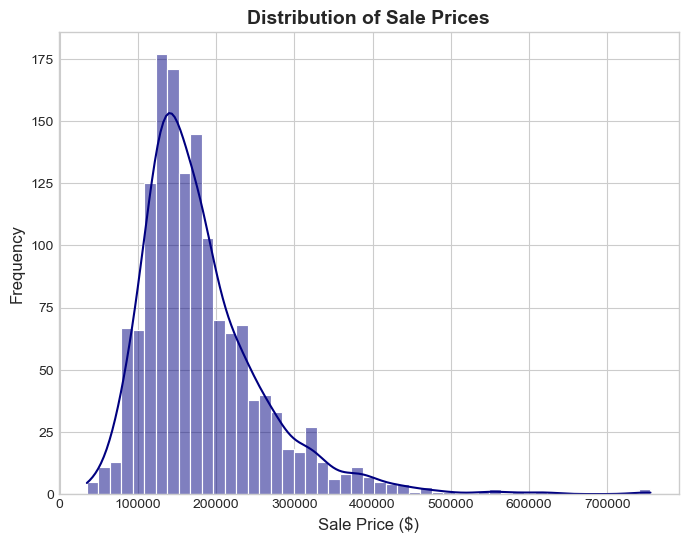

In [42]:
# Plot SalesPrice distribution
plt.style.use('seaborn-whitegrid')
sns.set_palette("deep")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_train, x='SalePrice', kde=True, color='navy', ax=ax)
ax.set_xlabel('Sale Price ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Sale Prices', fontsize=14, fontweight='bold')
plt.show()

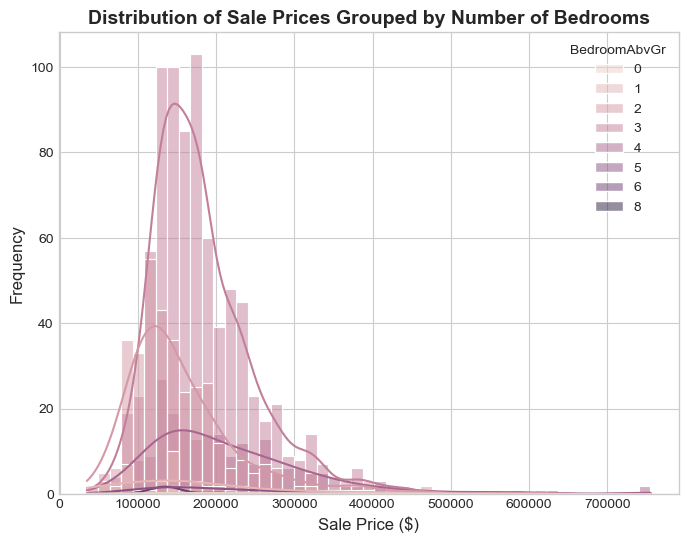

In [43]:
# sales price with num bedrooms
plt.style.use('seaborn-whitegrid')
sns.set_palette("deep")
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting histogram with grouping by number of bedrooms using 'hue'
sns.histplot(data=df_train, x='SalePrice', hue='BedroomAbvGr', kde=True, ax=ax)

ax.set_xlabel('Sale Price ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Sale Prices Grouped by Number of Bedrooms', fontsize=14, fontweight='bold')

plt.show()


In [44]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [45]:
df_train[quantitative].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [124]:
qualitative

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

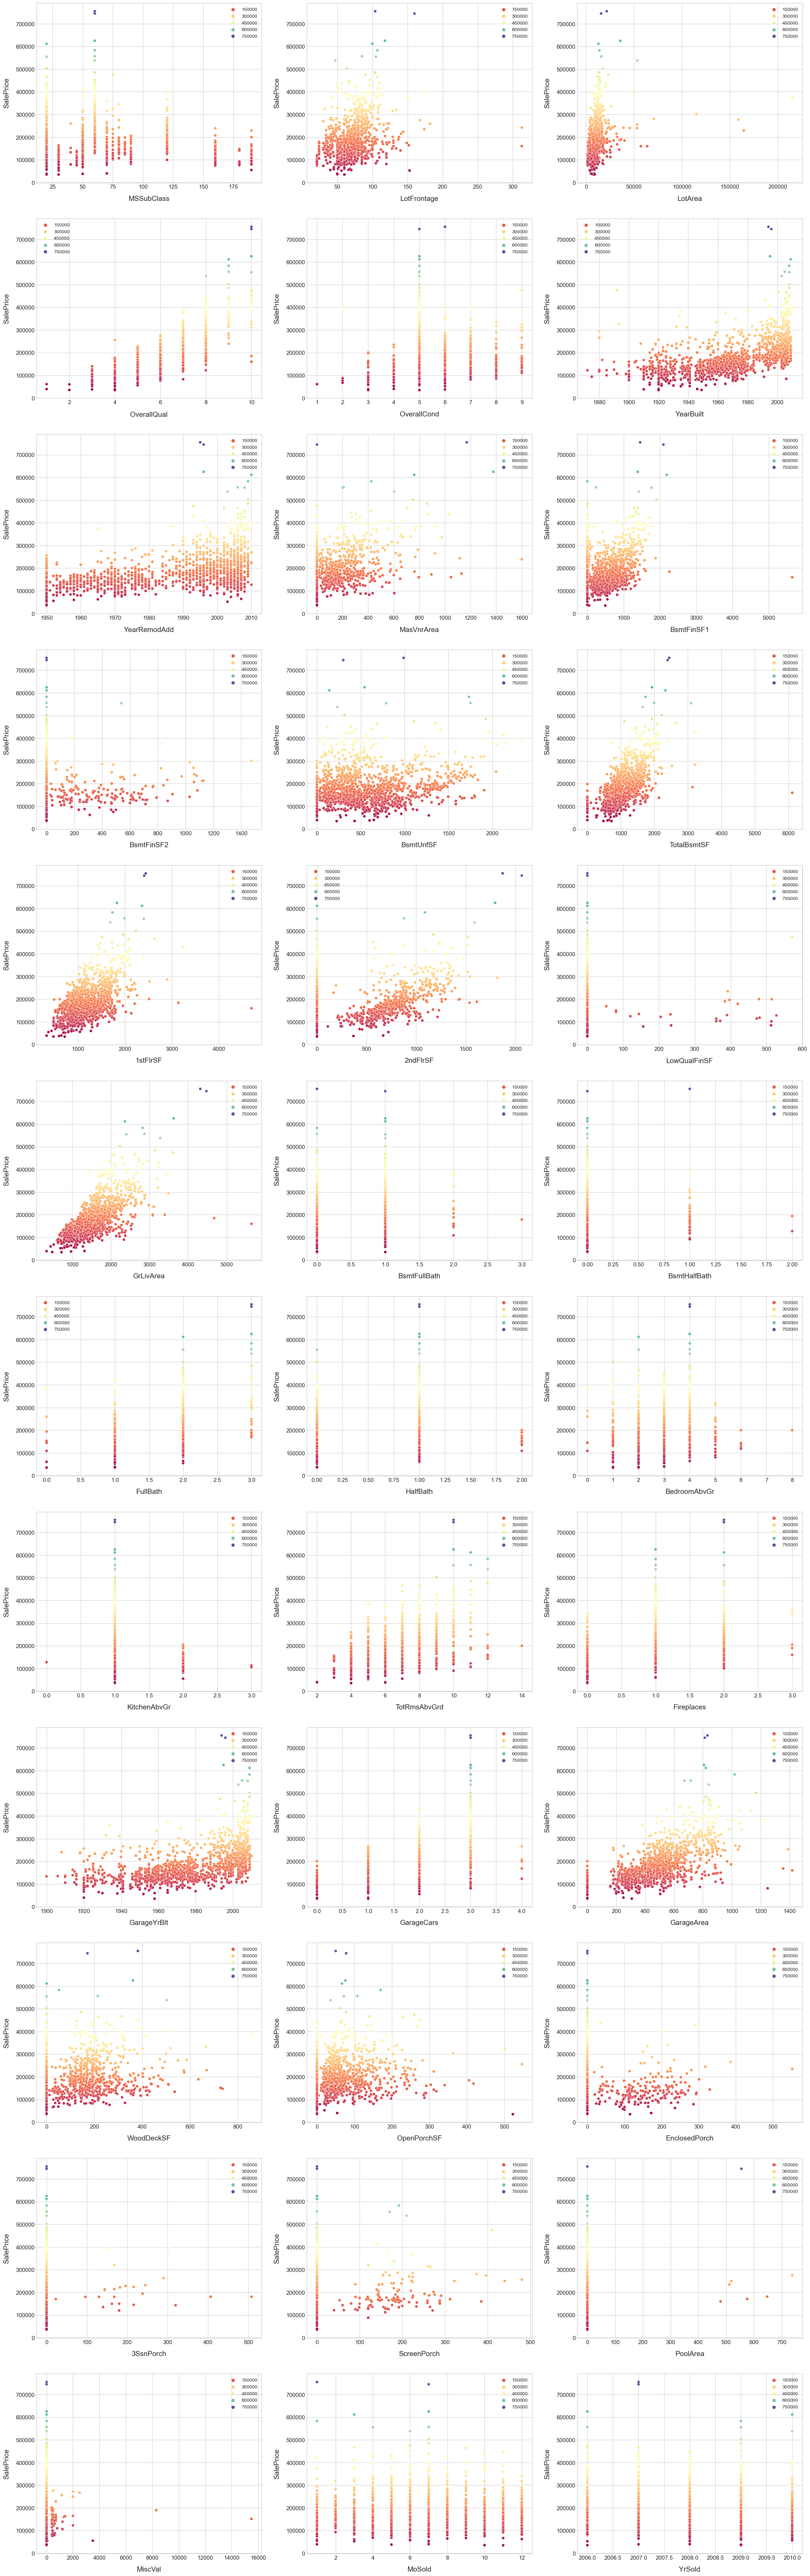

In [46]:
# Visualising Quantitative features in the dataset
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)

for i, feature in enumerate(list(quantitative), 1):
    plt.subplot(len(list(quantitative)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Spectral', data=df_train)
    
    plt.xlabel(f"{feature}", size=15, labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size' : 10})

plt.show()

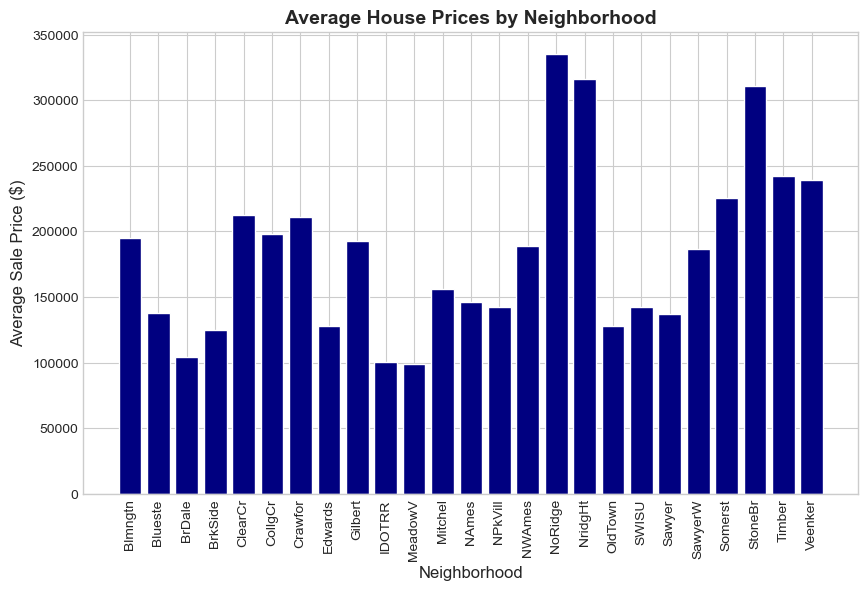

In [47]:
plt.style.use('seaborn-whitegrid')

avg_prices = df_train.groupby("Neighborhood")["SalePrice"].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(avg_prices["Neighborhood"], avg_prices["SalePrice"], color='navy')

ax.set_xlabel('Neighborhood', fontsize=12)
ax.set_ylabel('Average Sale Price ($)', fontsize=12)
ax.set_title('Average House Prices by Neighborhood', fontsize=14, fontweight='bold')

plt.xticks(rotation=90)

plt.show()


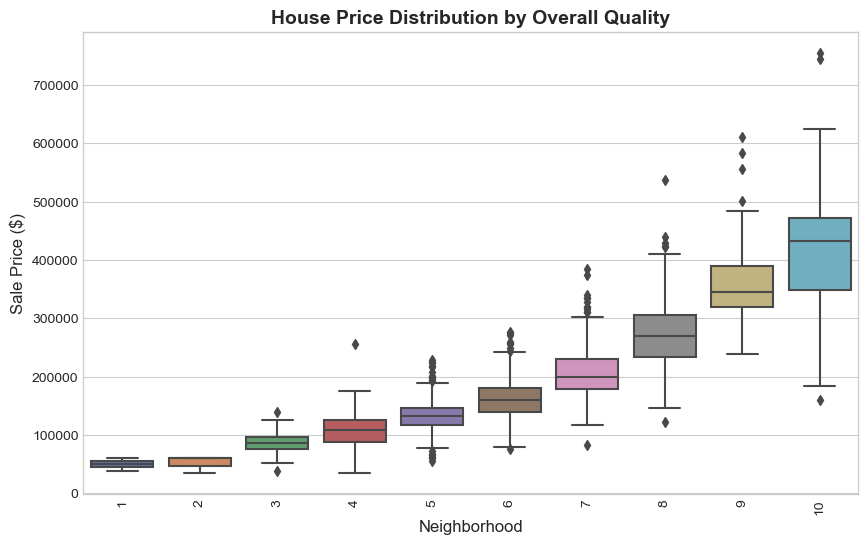

In [48]:
plt.style.use('seaborn-whitegrid')


fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_train, x="OverallQual", y="SalePrice", ax=ax)

# Adding labels and title
ax.set_xlabel('Neighborhood', fontsize=12)
ax.set_ylabel('Sale Price ($)', fontsize=12)
ax.set_title('House Price Distribution by Overall Quality', fontsize=14, fontweight='bold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


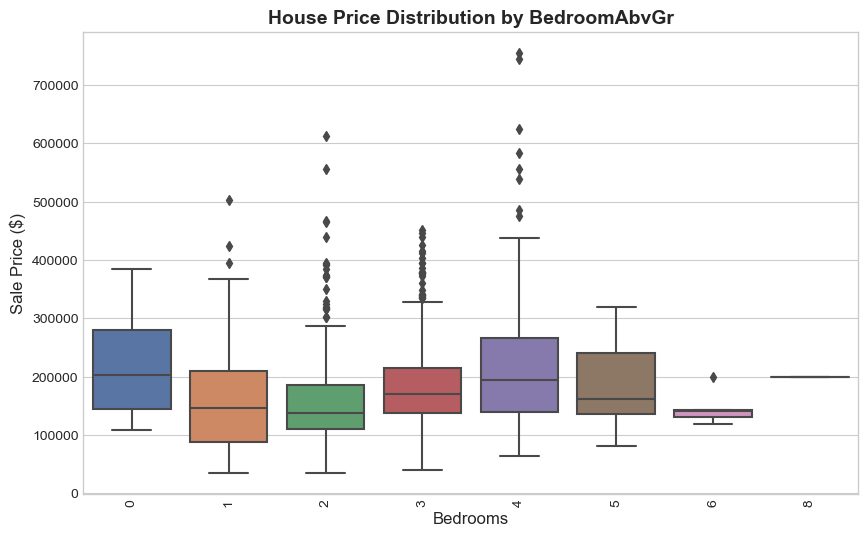

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_train, x="BedroomAbvGr", y="SalePrice", ax=ax)

# Adding labels and title
ax.set_xlabel('Bedrooms', fontsize=12)
ax.set_ylabel('Sale Price ($)', fontsize=12)
ax.set_title('House Price Distribution by BedroomAbvGr', fontsize=14, fontweight='bold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

# Mean and Std deviation of Sale Price

In [130]:
df_train['SalePrice'].mean(), df_train['SalePrice'].std()

(180921.19589041095, 79442.50288288663)

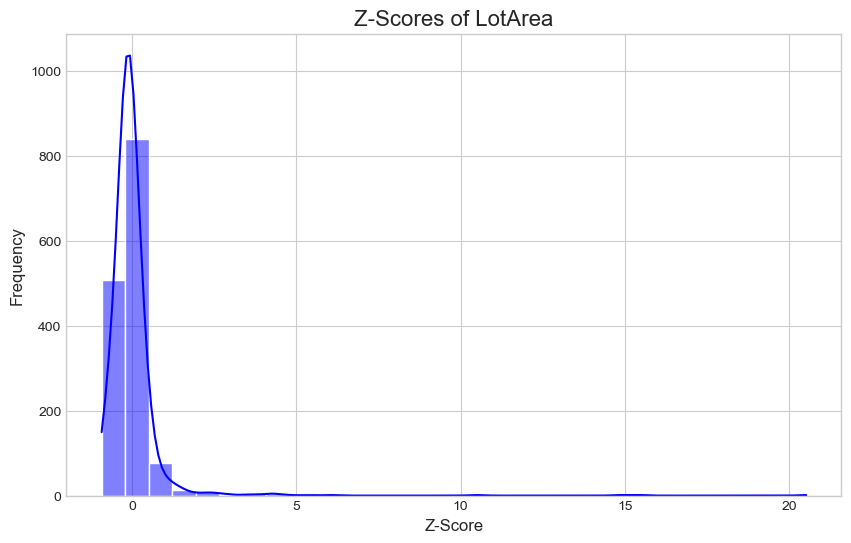

In [50]:
z_scores = stats.zscore(df_train['LotArea'])

plt.figure(figsize=(10, 6))
sns.histplot(z_scores, bins=30, kde=True, color='blue')

plt.title('Z-Scores of LotArea', fontsize=16)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


In [51]:
outliersLA = df_train[stats.zscore(df_train['LotArea']) >5]
outliersLA

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


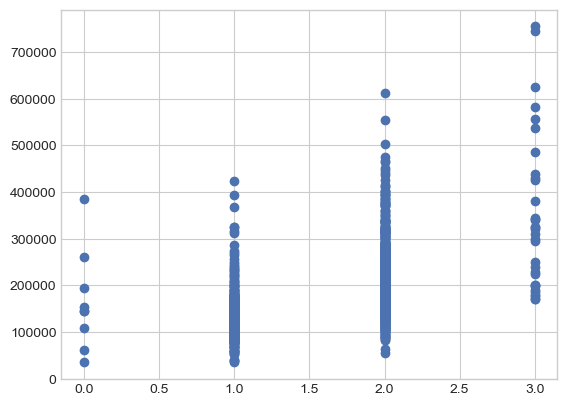

In [52]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data = df_train)

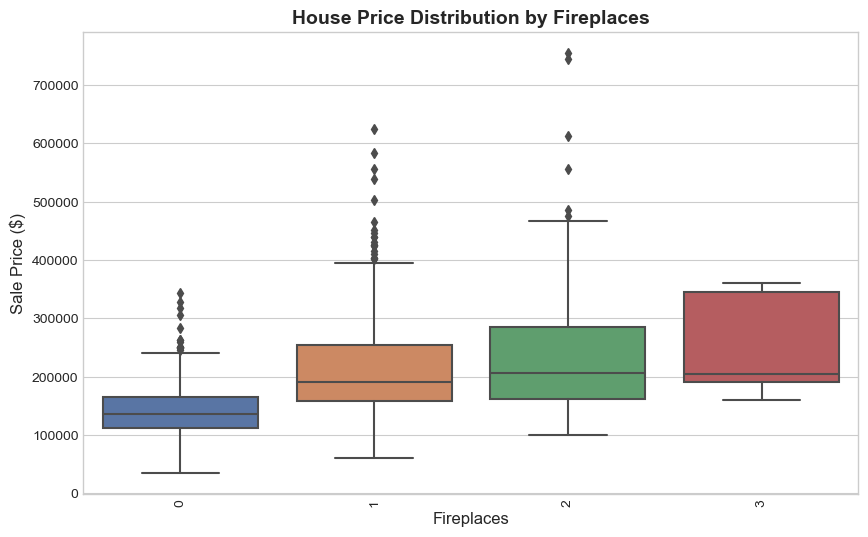

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df_train, x="Fireplaces", y="SalePrice", ax=ax)

# Adding labels and title
ax.set_xlabel('Fireplaces', fontsize=12)
ax.set_ylabel('Sale Price ($)', fontsize=12)
ax.set_title('House Price Distribution by Fireplaces', fontsize=14, fontweight='bold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()

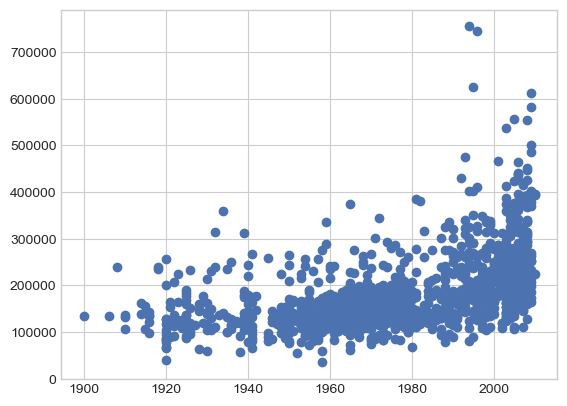

In [54]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

In [55]:
df_train['YearBuilt'].corr(df_train['GarageYrBlt'])

0.825667484174342

In [56]:
# First, check how many rows are null in either column
print("Number of NaNs in GarageYrBlt:", df_train['GarageYrBlt'].isnull().sum())
print("Number of NaNs in YearBuilt:", df_train['YearBuilt'].isnull().sum())

# Drop rows where either column has NaN values to ensure a fair comparison
df_clean = df_train.dropna(subset=['GarageYrBlt', 'YearBuilt'])

# Compare the two columns and find how many rows have different values
different_rows = df_clean[df_clean['GarageYrBlt'] != df_clean['YearBuilt']]

# Count the number of rows where the values are different
num_different = different_rows.shape[0]

print(f"Number of rows where GarageYrBlt and YearBuilt are different: {num_different}")

# Optionally, check how many rows have the same value
num_same = df_clean[df_clean['GarageYrBlt'] == df_clean['YearBuilt']].shape[0]
print(f"Number of rows where GarageYrBlt and YearBuilt are the same: {num_same}")


Number of NaNs in GarageYrBlt: 81
Number of NaNs in YearBuilt: 0
Number of rows where GarageYrBlt and YearBuilt are different: 290
Number of rows where GarageYrBlt and YearBuilt are the same: 1089


In [167]:
#GarageYrBlt and YearBuilt are almost the same drop GarageYrBlt
df_train = df_train.drop('GarageYrBlt', axis = 1)
df_test = df_test.drop('GarageYrBlt', axis = 1)

In [58]:
from scipy.stats import zscore
numeric_cols = df_train.select_dtypes(include=[np.number])
z_scores = numeric_cols.apply(zscore)


In [57]:
high_z_scores = z_scores[z_scores > 10]
potential_outlier_drop = high_z_scores.dropna(how='all').index

In [170]:
# review Qualitative columns 
for col in qualitative:
    num_categories = df_train[col].nunique()
    print(f"Column '{col}' has {num_categories} unique categories.")

Column 'MSZoning' has 5 unique categories.
Column 'Street' has 2 unique categories.
Column 'LotShape' has 4 unique categories.
Column 'LandContour' has 4 unique categories.
Column 'Utilities' has 2 unique categories.
Column 'LotConfig' has 5 unique categories.
Column 'LandSlope' has 3 unique categories.
Column 'Neighborhood' has 25 unique categories.
Column 'Condition1' has 9 unique categories.
Column 'Condition2' has 8 unique categories.
Column 'BldgType' has 5 unique categories.
Column 'HouseStyle' has 8 unique categories.
Column 'RoofStyle' has 6 unique categories.
Column 'RoofMatl' has 8 unique categories.
Column 'Exterior1st' has 15 unique categories.
Column 'Exterior2nd' has 16 unique categories.
Column 'ExterQual' has 4 unique categories.
Column 'ExterCond' has 5 unique categories.
Column 'Foundation' has 6 unique categories.
Column 'BsmtQual' has 4 unique categories.
Column 'BsmtCond' has 4 unique categories.
Column 'BsmtExposure' has 4 unique categories.
Column 'BsmtFinType1' 

# Feature Engineering